# Travailler avec un jeu de données

## A) Préparation

### 1) On s'équipe des outils dont nous aurons besoin

- La bibliothèque d'analyse de données
- La bibliothèque destinée à tracer et visualiser des données sous forme de graphiques
- La bibliothèque de gestion des dates

In [585]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

### 2) Puis on se connecte à notre base de données

La base de données des participants:  
https://docs.google.com/a/tamedia.com/spreadsheets/d/1KtvS7DVQ5qzK6LHWt5npAcZBhBsTlTfJkzOdN7E03DA/edit?usp=sharing

#### Charge la base de données directement depuis Google

On remplace toutes les valeurs nulles - par exemple, si un utilisateur à répondu *aucun* dans la cellule *Nombre d'enfants* - par zéro.

In [586]:
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRwQgWrUdT_NYxOK7uSzYTbwU445CWe18-0M0KJIJFShWBf-jtzVU9B7PzKsV5yKbYULDNaNUlLtxmj/pub?gid=0&single=true&output=csv'

df = pd.read_csv(
    spreadsheet_url,
    error_bad_lines=False,
    na_values=[0, "Non", "non", "NoN", "NON", "Aucun", "aucun"])

#### Le jeu de données complet

In [675]:
df

,Prénom,Signe astrologique,Date de naissance,Taille en cm,Nombre d'enfants,Sexe,Age,Groupe d'âge
0,lily,Gémeaux,1962-06-22,176.0,0.0,f,55.0,1
1,anna,Taureau,1960-06-12,178.0,0.0,f,57.0,2
2,jayden,Taureau,1950-02-19,162.0,0.0,h,67.0,3
3,abby,Lion,1980-07-07,189.0,3.0,f,37.0,1
4,signe,Lion,1988-09-02,189.0,3.0,f,29.0,0
5,sofia,Verseau,1956-10-05,167.0,1.0,f,61.0,2
6,marianne,Cancer,1956-10-01,178.0,2.0,f,61.0,2
7,celísio,Lion,1944-09-29,190.0,0.0,h,73.0,3
8,katarina,Scorpion,1949-10-11,156.0,1.0,f,68.0,3
9,vedat,Capricorne,1987-10-06,176.0,0.0,h,30.0,0


#### Montre les cinq premières lignes du jeu de données

In [587]:
df.head()

,Prénom,Signe astrologique,Date de naissance,Taille en cm,Nombre d'enfants,Sexe
0,lily,Gémeaux,22.06.1962,176,NaN,f
1,anna,Taureau,6.12.1960,178,NaN,f
2,jayden,Taureau,19.2.1950,162,NaN,h
3,abby,Lion,7.7.1980,189,3.0,f
4,signe,Lion,9.2.1988,189,3.0,f


In [657]:
df["Prénom"]

0         lily
1         anna
2       jayden
3         abby
4        signe
5        sofia
6     marianne
7      celísio
8     katarina
9        vedat
10       vicki
11     vicente
12     frankie
13        lisa
14       hanna
15        aatu
16     carolyn
17        kaya
18        aatu
Name: Prénom, dtype: object

In [681]:
df[df["Signe astrologique"] == "Taureau"]

,Prénom,Signe astrologique,Date de naissance,Taille en cm,Nombre d'enfants,Sexe,Age,Groupe d'âge
1,anna,Taureau,1960-06-12,178.0,0.0,f,57.0,2
2,jayden,Taureau,1950-02-19,162.0,0.0,h,67.0,3


In [682]:
df[df["Nombre d'enfants"] == 1]

,Prénom,Signe astrologique,Date de naissance,Taille en cm,Nombre d'enfants,Sexe,Age,Groupe d'âge
5,sofia,Verseau,1956-10-05,167.0,1.0,f,61.0,2
8,katarina,Scorpion,1949-10-11,156.0,1.0,f,68.0,3
11,vicente,Verseau,1966-03-06,172.0,1.0,h,51.0,1
15,aatu,Vierge,1954-03-25,168.0,1.0,h,63.0,3
17,kaya,Cancer,1955-05-06,178.0,1.0,h,62.0,3


In [685]:
df[df["Prénom"].str.contains("na")]

,Prénom,Signe astrologique,Date de naissance,Taille en cm,Nombre d'enfants,Sexe,Age,Groupe d'âge
1,anna,Taureau,1960-06-12,178.0,0.0,f,57.0,2
8,katarina,Scorpion,1949-10-11,156.0,1.0,f,68.0,3
14,hanna,Bélier,1979-09-27,182.0,2.0,f,38.0,1


### 3) On corrige les éventuelles erreurs et on convertit les données en un format que le système comprend

#### Les dates et chiffres sont transformés

In [588]:
df["Date de naissance"] = pd.to_datetime(df["Date de naissance"])
df["Nombre d'enfants"].fillna(0, inplace=True)
df["Taille en cm"] = df["Taille en cm"].replace(r"[^0-9]", "", regex=True).astype(float)

#### Calcule l'âge de chacun d'entre nous

In [589]:
now = pd.Timestamp(datetime.datetime.now())
df["Age"] = (now - df["Date de naissance"]).astype('<m8[Y]')

#### Vérifie le résultat des modifications

In [590]:
df.head()

,Prénom,Signe astrologique,Date de naissance,Taille en cm,Nombre d'enfants,Sexe,Age
0,lily,Gémeaux,1962-06-22,176.0,0.0,f,55.0
1,anna,Taureau,1960-06-12,178.0,0.0,f,57.0
2,jayden,Taureau,1950-02-19,162.0,0.0,h,67.0
3,abby,Lion,1980-07-07,189.0,3.0,f,37.0
4,signe,Lion,1988-09-02,189.0,3.0,f,29.0


## B) Un aperçu rapide de notre jeu de données

### 1) Affiche le nombre de lignes et de colonnes de notre base données (Combien nous sommes et combien de paramètres nous caractérisent)

In [591]:
df.shape

(19, 7)

### 2) Affiche le nom de chaque paramètre qui nous caractérise ainsi que son type de donnée

In [592]:
df.dtypes

Prénom                        object
Signe astrologique            object
Date de naissance     datetime64[ns]
Taille en cm                 float64
Nombre d'enfants             float64
Sexe                          object
Age                          float64
dtype: object

### 3) Nous pourrions commencer par demander un aperçu statistique de notre groupe

In [593]:
df.describe()

,Taille en cm,Nombre d'enfants,Age
count,19.000000,19.000000,19.000000
mean,176.526316,1.368421,50.052632
std,9.535713,1.256562,15.565181
min,156.000000,0.000000,27.000000
25%,170.500000,0.000000,34.000000
50%,178.000000,1.000000,55.000000
75%,183.000000,2.000000,61.500000
max,190.000000,4.000000,73.000000


## C) Explorer le jeu de données pour y dénicher un sujet

### 1) Les hommes qui travaillent ont-ils plus d'enfants que les femmes dans la même situation?

#### Nombre d'hommes et de femmes

In [656]:
df["Sexe"].value_counts()

f    11
h     8
Name: Sexe, dtype: int64

#### Somme du nombre d'enfants des hommes et des femmes

In [594]:
df.groupby("Sexe")["Nombre d'enfants"].sum()

Sexe
f    17.0
h     9.0
Name: Nombre d'enfants, dtype: float64

#### Un résultat plus détaillé donnerait

In [595]:
df.groupby("Sexe")["Nombre d'enfants"].value_counts()

Sexe  Nombre d'enfants
f     0.0                 3
      2.0                 3
      3.0                 3
      1.0                 2
h     0.0                 3
      1.0                 3
      2.0                 1
      4.0                 1
Name: Nombre d'enfants, dtype: int64

#### ... et en pourcentage?

In [674]:
df.groupby("Sexe")["Nombre d'enfants"].value_counts(normalize=True)

Sexe  Nombre d'enfants
f     0.0                 0.272727
      2.0                 0.272727
      3.0                 0.272727
      1.0                 0.181818
h     0.0                 0.375000
      1.0                 0.375000
      2.0                 0.125000
      4.0                 0.125000
Name: Nombre d'enfants, dtype: float64

#### Que nous dit la moyenne d'enfants par groupes?

In [597]:
df.groupby("Sexe")["Nombre d'enfants"].mean()

Sexe
f    1.545455
h    1.125000
Name: Nombre d'enfants, dtype: float64

#### et le nombre médian d'enfants par groupes?

In [598]:
df.groupby("Sexe")["Nombre d'enfants"].median()

Sexe
f    2.0
h    1.0
Name: Nombre d'enfants, dtype: float64

### 2) Et si nous nous groupions par signe astrologique?

In [599]:
df["Signe astrologique"].value_counts()

Scorpion      4
Lion          4
Taureau       2
Cancer        2
Verseau       2
Gémeaux       1
Vierge        1
Capricorne    1
Sagittaire    1
Bélier        1
Name: Signe astrologique, dtype: int64

In [600]:
df.groupby("Signe astrologique")["Nombre d'enfants"].sum()

Signe astrologique
Bélier         2.0
Cancer         3.0
Capricorne     0.0
Gémeaux        0.0
Lion           8.0
Sagittaire     0.0
Scorpion      10.0
Taureau        0.0
Verseau        2.0
Vierge         1.0
Name: Nombre d'enfants, dtype: float64

#### Pour plus de lisibilité, nous pourrions afficher la liste précédente sous la forme d'un graphique

On groupe par signe astrologique, on demande la somme de chaque signe puis on classe le résultat par ordre décroissant avant de produire le graphique.

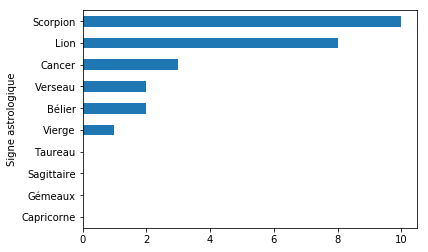

In [601]:
df.groupby("Signe astrologique")["Nombre d'enfants"].sum().sort_values().plot(kind="barh")

#### Si nous voulions isoler un signe astrologique

In [602]:
df[df['Signe astrologique'] == "Scorpion"]

,Prénom,Signe astrologique,Date de naissance,Taille en cm,Nombre d'enfants,Sexe,Age
8,katarina,Scorpion,1949-10-11,156.0,1.0,f,68.0
10,vicki,Scorpion,1988-10-25,179.0,3.0,f,29.0
12,frankie,Scorpion,1964-11-28,184.0,4.0,h,52.0
18,aatu,Scorpion,1957-01-04,170.0,2.0,h,60.0


### 3) Qui sont les plus jeunes? les plus vieux?

In [603]:
df[["Prénom", "Age"]].sort_values(by="Age")

,Prénom,Age
16,carolyn,27.0
4,signe,29.0
10,vicki,29.0
9,vedat,30.0
13,lisa,31.0
3,abby,37.0
14,hanna,38.0
11,vicente,51.0
12,frankie,52.0
0,lily,55.0


#### Quelles sont les tranches d'âge les plus représentées?

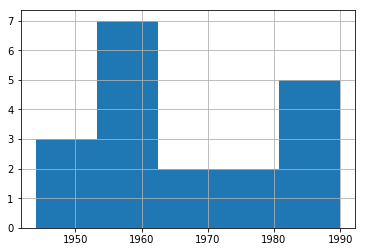

In [604]:
df['Date de naissance'].dt.year.hist(bins=5)

#### Quels sont les mois les plus propices aux naissances?

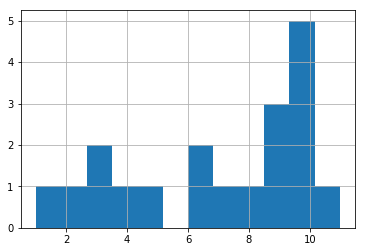

In [605]:
df['Date de naissance'].dt.month.hist(bins=12)

#### A la conception?

In [696]:
for index, row in df.iterrows():
    print((row['Date de naissance'].month - 9) % 12)

9
9
5
10
0
1
1
0
1
1
1
6
2
11
0
6
7
8
4


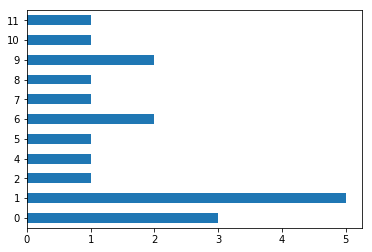

In [706]:
(pd.Series((df['Date de naissance'].dt.month - 9) % 12)
 .sort_values()
 .value_counts(sort=False)
 .plot(kind="barh"))

#### Que peut-on tirer des jours de naissance?

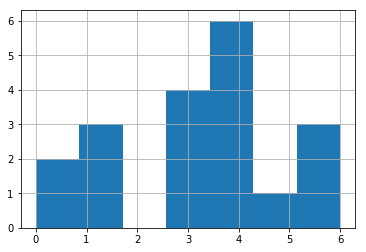

In [606]:
df['Date de naissance'].dt.weekday.hist(bins=7)

#### Affichons un histogramme des âges divisés en cinq tranches

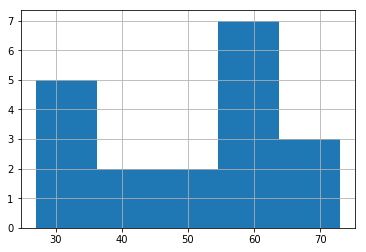

In [708]:
df['Age'].hist(bins=5)

### Age moyen

In [608]:
df['Age'].mean()

50.05263157894737

### Age médian

In [609]:
df['Age'].median()

55.0

### Repartissons-nous en cinq groupes d'âge
Discrétiser notre série d'âges en 5 quantiles grâce à la fonction qcut

In [610]:
pd.qcut(df['Age'], 5, labels=False, retbins=True)

(0     2
 1     2
 2     4
 3     1
 4     0
 5     3
 6     3
 7     4
 8     4
 9     0
 10    0
 11    1
 12    2
 13    1
 14    1
 15    4
 16    0
 17    3
 18    3
 Name: Age, dtype: int64, array([ 27. ,  30.6,  51.2,  59.4,  62.4,  73. ]))

#### La liste précédente ne nous donne pas d'autre information que l'index de la ligne et le numéro de son groupe.
Ajoutons ce numéro, qui représente un quintile, à notre jeu de données.

In [611]:
df["Groupe d'âge"] = pd.qcut(df['Age'], 4, labels=False)
df.head()

,Prénom,Signe astrologique,Date de naissance,Taille en cm,Nombre d'enfants,Sexe,Age,Groupe d'âge
0,lily,Gémeaux,1962-06-22,176.0,0.0,f,55.0,1
1,anna,Taureau,1960-06-12,178.0,0.0,f,57.0,2
2,jayden,Taureau,1950-02-19,162.0,0.0,h,67.0,3
3,abby,Lion,1980-07-07,189.0,3.0,f,37.0,1
4,signe,Lion,1988-09-02,189.0,3.0,f,29.0,0


#### Qui appartient au premier groupe d'âge (les plus jeunes)?

In [612]:
df[df["Groupe d'âge"] == 0]

,Prénom,Signe astrologique,Date de naissance,Taille en cm,Nombre d'enfants,Sexe,Age,Groupe d'âge
4,signe,Lion,1988-09-02,189.0,3.0,f,29.0,0
9,vedat,Capricorne,1987-10-06,176.0,0.0,h,30.0,0
10,vicki,Scorpion,1988-10-25,179.0,3.0,f,29.0,0
13,lisa,Lion,1986-08-28,189.0,2.0,f,31.0,0
16,carolyn,Sagittaire,1990-04-05,171.0,0.0,f,27.0,0


#### Les jeunes sont-ils plus grands que les moins jeunes?

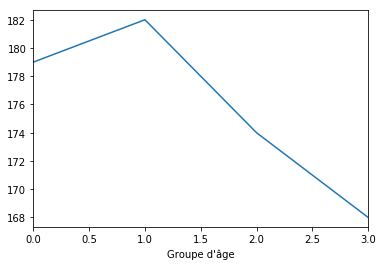

In [613]:
df.groupby("Groupe d'âge")["Taille en cm"].median().plot()

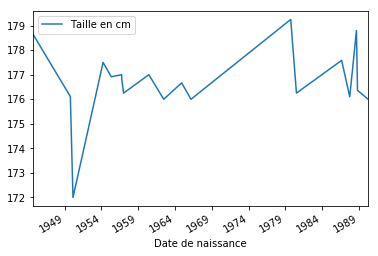

In [655]:
df.rolling(12, on='Date de naissance', min_periods=1).mean().plot(x="Date de naissance", y="Taille en cm")

### 4) A partir de quel âge notre échantillon commence-t-il à fonder une famille?
Quel est le degré de corrélation entre les âges et le nombre d'enfants

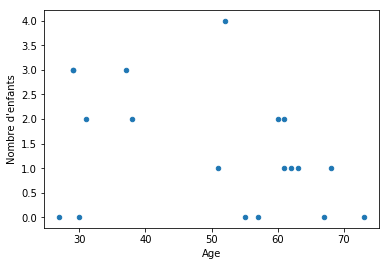

In [614]:
df.plot(kind="scatter", x="Age", y="Nombre d'enfants")

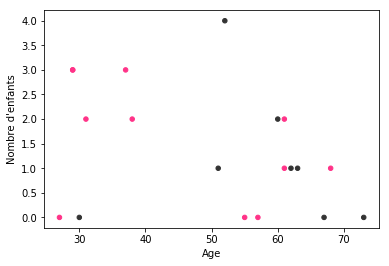

In [615]:
colors_list = []
for index, row in df.iterrows():
    if row['Sexe'] == "f":
        colors_list.append("#ff3388")
    else:
        colors_list.append("#333333")

df.plot(kind="scatter", x="Age", y="Nombre d'enfants", color=colors_list)

### 5) Qui est susceptible de bien s'entendre avec qui?

#### Écart normalisé entre chaque valeur et la moyenne

In [616]:
df_values = df[["Age", "Taille en cm", "Nombre d'enfants"]]
df_norm = (df_values - df_values.mean()) / (df_values.max() - df_values.min())
df_norm.head()

,Age,Taille en cm,Nombre d'enfants
0,0.107551,-0.015480,-0.342105
1,0.151030,0.043344,-0.342105
2,0.368421,-0.427245,-0.342105
3,-0.283753,0.366873,0.407895
4,-0.457666,0.366873,0.407895


#### Ecart des âges classé par ordre croissant

In [617]:
df_norm.sort_values(by="Age")

,Age,Taille en cm,Nombre d'enfants
16,-0.501144,-0.162539,-0.342105
4,-0.457666,0.366873,0.407895
10,-0.457666,0.072755,0.407895
9,-0.435927,-0.015480,-0.342105
13,-0.414188,0.366873,0.157895
3,-0.283753,0.366873,0.407895
14,-0.262014,0.160991,0.157895
11,0.020595,-0.133127,-0.092105
12,0.042334,0.219814,0.657895
0,0.107551,-0.015480,-0.342105


#### Difficile de lire le tableau ci-dessus. Essayons d'en faire un graphique.

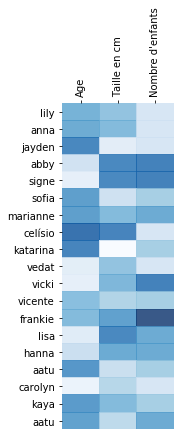

In [621]:
# Le canevas du graphique
fig, ax = plt.subplots()
heatmap = ax.pcolor(df_norm, cmap=plt.cm.Blues, alpha=0.8)

# Format
fig = plt.gcf()
fig.set_size_inches(2, 6)

# Masque le cadre
ax.set_frame_on(False)

# Positionne les ticks
ax.set_yticks(np.arange(df.shape[0]) + 0.5, minor=False)
ax.set_xticks(np.arange(df_norm.shape[1]) + 0.5, minor=False)

# Donne l'apparence d'un tableau
ax.invert_yaxis()
ax.xaxis.tick_top()

# Définit les labels
ax.set_xticklabels(["Age", "Taille en cm", "Nombre d'enfants"], minor=False)
ax.set_yticklabels(df["Prénom"], minor=False)

# Pivote les labels du dessus
plt.xticks(rotation=90)

ax.grid(False)

### 6) Qui sort du lot?

In [619]:
moyenne = (abs(df_norm["Taille en cm"]) 
           + abs(df_norm["Nombre d'enfants"])
           + abs(df_norm["Age"])) / 3

moyenne.sort_values(ascending=False)

7     0.412415
4     0.410811
2     0.379257
8     0.361994
3     0.352840
16    0.335263
13    0.312985
10    0.312772
12    0.306681
9     0.264504
15    0.208115
5     0.203426
14    0.193633
18    0.188697
1     0.178826
0     0.155046
6     0.146408
17    0.131725
11    0.081942
dtype: float64

#### On veut des noms!

In [620]:
df_moyenne = pd.DataFrame(moyenne)
df_moyenne['nom'] = df['Prénom']
df_moyenne.sort_values(by=0, ascending=False)

,0,nom
7,0.412415,celísio
4,0.410811,signe
2,0.379257,jayden
8,0.361994,katarina
3,0.352840,abby
16,0.335263,carolyn
13,0.312985,lisa
10,0.312772,vicki
12,0.306681,frankie
9,0.264504,vedat
